<a href="https://colab.research.google.com/github/avilla03/Convolutional-NN-Project/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dataset onto colab

In [ ]:

import zipfile # Import data in form of a zipfile
from pathlib import Path # Store path of data
data_path = Path("data/")
images_path = data_path / "med_gallery"
if images_path.is_dir():
  print(f"{images_path} directory already exists, skipping download")
else:
  print(f"{images_path} does not exist, creating one...")
  images_path.mkdir(parents=True, exist_ok=True) # make directory and create parent directories
                               # if needed. It is ok if this dir exists already
  zip_file_path = "/content/drive/MyDrive/archive.zip"
  extraction_path = images_path
  with zipfile.ZipFile(zip_file_path, 'r') as zip:
    print('Extracting all the files now...')
    zip.extractall(extraction_path)
    print('Done!')

# specifying the zip file name from google drive & extraction paths

data/med_gallery does not exist, creating one...
Extracting all the files now...
Done!


Seperate dataset into train and test sets

In [ ]:
import os

data_directory = "/content/data"  # Path to data directory

# Create med_gallery, train, and test directories
train_dir = os.path.join(data_directory, "train")
test_dir = os.path.join(data_directory, "test")

# Create subdirectories under train and test
for subdir in ["0", "1"]:
    os.makedirs(os.path.join(train_dir, subdir), exist_ok=True)
    os.makedirs(os.path.join(test_dir, subdir), exist_ok=True)

In [ ]:
main_directory = "/content/data"
os.chdir(main_directory)
subdir_path = os.path.join(main_directory, "med_gallery")
os.chdir(subdir_path)
excluded_directory = "IDC_regular_ps50_idx5"
subdirectories = []
for i in os.listdir():
  if os.path.isdir(i) and i != excluded_directory:
    subdirectories.append(i)
combined_files_0 = []
combined_files_1 = []
for sub_sub_dir in subdirectories:
  sub_sub_dir_path = os.path.join(subdir_path, sub_sub_dir)
  for sub_sub_sub_dir in os.listdir(sub_sub_dir_path):
    sub_sub_sub_dir_path = os.path.join(sub_sub_dir_path, sub_sub_sub_dir)
    for file_name in os.listdir(sub_sub_sub_dir_path):
      file_path = os.path.join(sub_sub_sub_dir_path, file_name)
      with open(file_path, "rb") as f:
        content = f.read()
        if sub_sub_sub_dir == "0":
          combined_files_0.append(content)
        elif sub_sub_sub_dir == "1":
          combined_files_1.append(content)
os.chdir(main_directory)
train_path = main_directory + "/" + "train"
test_path = main_directory + "/" + "test"
divide_count0, divide_count1 = int(len(combined_files_0) * .75), int(len(combined_files_1) * .75)
for sub_dir in os.listdir(train_path):
  if sub_dir == "0":
    sub_dir_path = os.path.join(train_path, "0")
    for idx, image in enumerate(combined_files_0[:divide_count0]):
      image_path = os.path.join(sub_dir_path,  f"train_image_0_{idx}.png")
      with open(image_path, "wb") as f:
        f.write(image)
  else:
    sub_dir_path = os.path.join(train_path, "1")
    for idx, image in enumerate(combined_files_1[:divide_count1]):
      image_path = os.path.join(sub_dir_path,  f"train_image_1_{idx}.png")
      with open(image_path, "wb") as f:
        f.write(image)
for sub_dir in os.listdir(test_path):
  if sub_dir == "0":
    sub_dir_path = os.path.join(test_path, "0")
    for idx, image in enumerate(combined_files_0[divide_count0:]):
      image_path = os.path.join(sub_dir_path, f"test_image_0_{idx}.png")
      with open(image_path, "wb") as f:
        f.write(image)
  else:
    sub_dir_path = os.path.join(test_path, "1")
    for idx, image in enumerate(combined_files_1[divide_count1:]):
      image_path = os.path.join(sub_dir_path,  f"test_image_1_{idx}.png")
      with open(image_path, "wb") as f:
        f.write(image)

Lets visualize our data and create tensors for a data

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"{len(dirnames)} directories, {len(filenames)} files in {dirpath}")
print(f"Test set:")
walk_through_dir(test_path)
print("--------------")
print("Train set:")
walk_through_dir(train_path)

Test set:
2 directories, 0 files in /content/data/test
0 directories, 49685 files in /content/data/test/0
0 directories, 19697 files in /content/data/test/1
--------------
Train set:
2 directories, 0 files in /content/data/train
0 directories, 149053 files in /content/data/train/0
0 directories, 59089 files in /content/data/train/1


/content/data/train/0/train_image_0_35844.png
Path to image: /content/data/train/0/train_image_0_35844.png
Image class: Negative
Image height: 50
Image height: 50


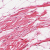

In [ ]:
# Lets take a random image
import random
from PIL import Image
train_images_path = Path("/content/data/train")
train_image_path_list = list(train_images_path.glob("*/*.png"))
random_train_image_path = random.choice(train_image_path_list)
print(random_train_image_path)
train_image_class = random_train_image_path.parent.stem
classification = ""
if train_image_class == "0":
  classification = "Negative"
else:
  classification = "Positive"
#Open image
img = Image.open(random_train_image_path)
#Print metadata
print(f"Path to image: {random_train_image_path}")
print(f"Image class: {classification}")
print(f"Image height: {img.height}")
print(f"Image height: {img.width}")
img

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np.asarray(img)

img_as_array.shape # height, width, color channels
print(img_as_array)

[[[240 235 238]
  [237 227 236]
  [193 170 196]
  ...
  [237 230 235]
  [242 238 238]
  [243 240 240]]

 [[238 228 232]
  [238 228 232]
  [210 163 190]
  ...
  [234 198 216]
  [224 193 214]
  [229 197 215]]

 [[242 239 241]
  [242 243 241]
  [236 220 228]
  ...
  [201 107 148]
  [217 123 161]
  [204 116 157]]

 ...

 [[235 190 205]
  [231 202 217]
  [236 203 217]
  ...
  [242 230 238]
  [242 240 239]
  [230 199 217]]

 [[205 121 150]
  [211  97 131]
  [207 104 136]
  ...
  [240 226 234]
  [236 223 231]
  [197 159 184]]

 [[221 120 151]
  [218 113 147]
  [219 112 149]
  ...
  [242 241 241]
  [244 240 241]
  [242 241 238]]]


Lets turn our data into tensors

(-0.5, 49.5, 49.5, -0.5)

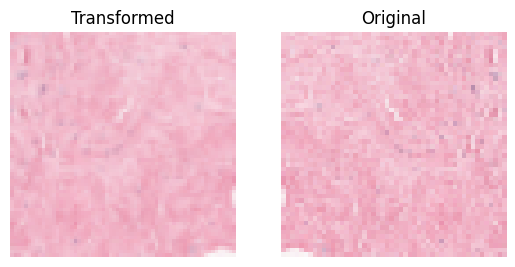

In [ ]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import random
train_images_path = Path("/content/data/train")
train_image_path_list = list(train_images_path.glob("*/*.png"))
random_train_image_path = random.choice(train_image_path_list)
img = Image.open(random_train_image_path)
# Tranform the data into larger images
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)), # 64 x 64 images
    transforms.RandomHorizontalFlip(p=0.6),# Randomly flip our data along the x-axis
    transforms.ToTensor() # turns a PIL image or np array to pytorch tensor
])
transformed_image = data_transform(img).permute(1,2,0)
fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(transformed_image)
ax[0].set_title("Transformed")
ax[0].axis("off")
ax[1].imshow(img)
ax[1].set_title("Original")
ax[1].axis("off")

In [ ]:
#Image folder to create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transform,
                                  target_transform=None,  #A transform for label/taget
                                  )
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 208142
     Root location: /content/data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.6)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 69382
     Root location: /content/data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.6)
                ToTensor()
            ))

In [ ]:
from torch.utils.data import Subset, DataLoader, random_split
subset_size = 30000
train_random_sampler = torch.utils.data.RandomSampler(train_data, replacement=False, num_samples=subset_size)
test_random_sampler = torch.utils.data.RandomSampler(test_data, replacement=False, num_samples=subset_size)

# Create a SubsetRandomSampler
train_subset_indices = list(train_random_sampler)
test_subset_indices = list(test_random_sampler)
# Create a Subset of the original full_dataset using the random indices
train_subset = Subset(train_data, train_subset_indices)
test_subset = Subset(test_data, test_subset_indices)
# Define batch size and other DataLoader parameters
BATCH_SIZE = 45
num_workers = 1
shuffle = True

# Create a new DataLoader for the subset
train_subset_dataloader = DataLoader(train_subset, batch_size=BATCH_SIZE, num_workers=num_workers, shuffle=shuffle)
test_subset_dataloader = DataLoader(test_subset, batch_size=BATCH_SIZE, num_workers=num_workers, shuffle=shuffle)
# Now, you can iterate through subset_dataloader to get the desired subset of data
for batch in train_subset_dataloader:
  train_feature, train_labels = batch
for batch in test_subset_dataloader:
  test_feature, test_labels = batch
train_feature, train_labels = next(iter(train_subset_dataloader))

In [ ]:
img, label = train_data[0][0], train_data[0][1]
img.shape

torch.Size([3, 64, 64])

In [ ]:
len(train_data),len(test_data)

(208142, 69382)

In [ ]:
from torch.utils.data import DataLoader
from torch import nn
BATCH_SIZE = 200
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers =1,
                              shuffle=True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              num_workers =1,
                              shuffle=True)
train_feature, train_labels = next(iter(train_dataloader))
train_feature.shape, train_labels.shape

(torch.Size([200, 3, 64, 64]), torch.Size([200]))

In [ ]:
train_feature.shape, train_labels.shape

(torch.Size([200, 3, 64, 64]), torch.Size([200]))

In [ ]:
class NewModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3,
                  out_channels=64,
                  kernel_size = 3,
                  stride =1,
                  padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2))
    self.connected_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 36864,
                  out_features = 128),
        nn.ReLU(),
        nn.Linear(in_features = 128,
                  out_features = 512),
        nn.ReLU(),
        nn.Dropout(p=.4),
        nn.Linear(in_features = 512,
                  out_features = 1))
  def forward(self,x):
    x = self.conv_layer(x)
    x = self.connected_layer(x)
    return x

In [ ]:
from torch import nn
class OverfitModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3,
                  out_channels = 20,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features=20),
        nn.Conv2d(in_channels = 20,
                  out_channels = 20,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features= 20),
        nn.MaxPool2d(kernel_size = 2))
    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 20,
                  out_channels = 40,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = 40),
        nn.Conv2d(in_channels = 40,
                  out_channels = 40,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = 40),
        nn.MaxPool2d(kernel_size = 2))
    self.conv_layer3 = nn.Sequential(
        nn.Conv2d(in_channels = 40,
                  out_channels = 40,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU())
    self.connected_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 10240,
                  out_features = 64),
        nn.ReLU(),
        nn.Dropout(.4),
        nn.Linear(in_features = 64,
                  out_features = 1)
        )
  def forward(self, X):
    X = self.conv_layer1(X)
    X = self.conv_layer2(X)
    X = self.conv_layer3(X)
    X = self.connected_layer(X)
    return X

In [ ]:
from torch import nn
class PredictionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3,
                  out_channels = 10,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features=10),
        nn.MaxPool2d(kernel_size = 2),
        nn.Conv2d(in_channels = 10,
                  out_channels = 15,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features=15),
        nn.MaxPool2d(kernel_size = 3, stride = 2),
        nn.Dropout(p=.3))
    self.conv_layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 15,
                  out_channels = 20,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features=20),
        nn.MaxPool2d(kernel_size = 3, stride = 2),
        nn.Conv2d(in_channels = 20,
                  out_channels = 20,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features=20),
        nn.MaxPool2d(kernel_size = 3, stride = 2),
        nn.Dropout(p=.3))
    self.connected_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 180,
                  out_features = 10),
        nn.ReLU(),
        nn.Linear(in_features = 10,
                  out_features = 1)
        )
  def forward(self, X):
    X = self.conv_layer1(X)
    X = self.conv_layer2(X)
    X = self.connected_layer(X)
    return X

In [ ]:
class PredictionModel0(nn.Module):
  def __init__(self):
    super().__init__()
    self.dense = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64*64*3,720),
        nn.ReLU(),
        nn.Linear(720,360),
        nn.ReLU(),
        nn.Linear(360,180),
        nn.ReLU(),
        nn.Linear(180,90),
        nn.ReLU(),
        nn.Linear(90,45),
        nn.ReLU())
    self.classifier = nn.Linear(45,1)
  def forward(self,x):
    x = self.dense(x)
    x = self.classifier(x)
    return x


In [ ]:
from torch import nn
class PredictionModel1(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3,
                  out_channels = 6,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.BatchNorm2d(6,3),
        nn.MaxPool2d(kernel_size = 3, stride = 2),
        nn.Dropout(p=.4))
    self.connected_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 5766,
                  out_features = 1),
        nn.ReLU(),
        nn.Linear(in_features = 64,
                  out_features = 1)
        )
  def forward(self, X):
    X = self.conv_layer1(X)
    X = self.connected_layer(X)
    return X

In [ ]:
len(train_data.classes)

2

In [ ]:
img.shape

torch.Size([3, 64, 64])

In [ ]:
import torch.nn.utils.prune as prune
device = "cuda" if torch.cuda.is_available() else "cpu"
model = PredictionModel2().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model.parameters(),
                          lr = .001,)
model(train_feature.to(device)).shape

torch.Size([200, 1])

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.sum(torch.eq(y_pred,y_true)).item()
    acc = (correct / len(y_true)) * 100
    return acc

In [ ]:
train_feature, train_labels = next(iter(train_dataloader))
train_feature.shape, train_labels.shape


In [ ]:
test_logits = model(train_feature.to(device))
y_test = train_labels.to(device)
y_pred = torch.round(torch.sigmoid(test_logits)).squeeze().to(device)
print(y_pred.shape)
acc = accuracy_fn(y_true = y_test, y_pred = y_pred)
acc, len(y_pred)

In [ ]:
y_logits = model.forward(train_feature.to(device))
y_pred = torch.round(torch.sigmoid(y_logits))
y_pred.shape,y_logits.shape, train_labels.dtype

In [ ]:
from tqdm.auto import tqdm
torch.manual_seed(12)
torch.cuda.manual_seed(12)
epochs = 50
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
for epoch in tqdm(range(epochs)):
  print(f" Model has seen data {epoch} times \n -------------")
  train_loss = 0
  train_acc = 0
  test_loss = 0
  test_acc = 0
  for batch, (X,y) in enumerate(train_subset_dataloader):
    X,y = X.to(device),y.to(device)
    y = y.to(torch.float32)
    model.train()
    y_logits = model.forward(X).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits,y)
    acc = accuracy_fn(y_true = y, y_pred = y_pred)
    train_loss += loss
    train_acc += acc
    for param in model.parameters():
      param.grad = None
    loss.backward()
    optimizer.step()
    #lr_scheduler.step(loss)
    if batch % 200 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_subset_dataloader.dataset)} samples.")
  train_loss /= len(train_subset_dataloader) # average per batch
  train_acc /= len(train_subset_dataloader)
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in test_subset_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_test = y_test.to(torch.float32).squeeze()
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss += loss_fn(test_logits,y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred)
    test_loss /= len(test_subset_dataloader)
    test_acc /= len(test_subset_dataloader)
    #lr_scheduler.step(test_loss)
    print(f"\nTrain loss avg: {train_loss: .4f} | Train acc avg: {train_acc: .4f} | Test loss avg: {test_loss: .4f}, Test acc avg: {test_acc: .4f}")

  0%|          | 0/50 [00:00<?, ?it/s]

 Model has seen data 0 times 
 -------------
Looked at 0 / 30000 samples.
Looked at 9000 / 30000 samples.
Looked at 18000 / 30000 samples.
Looked at 27000 / 30000 samples.

Train loss avg:  0.3852 | Train acc avg:  83.5416 | Test loss avg:  0.3869, Test acc avg:  82.9319
 Model has seen data 1 times 
 -------------
Looked at 0 / 30000 samples.
Looked at 9000 / 30000 samples.
Looked at 18000 / 30000 samples.
Looked at 27000 / 30000 samples.

Train loss avg:  0.3511 | Train acc avg:  85.2274 | Test loss avg:  0.6355, Test acc avg:  66.1003
 Model has seen data 2 times 
 -------------
Looked at 0 / 30000 samples.
Looked at 9000 / 30000 samples.
Looked at 18000 / 30000 samples.
Looked at 27000 / 30000 samples.

Train loss avg:  0.3390 | Train acc avg:  85.8487 | Test loss avg:  0.3607, Test acc avg:  84.6393
 Model has seen data 3 times 
 -------------
Looked at 0 / 30000 samples.
Looked at 9000 / 30000 samples.
Looked at 18000 / 30000 samples.
Looked at 27000 / 30000 samples.

Train loss 

KeyboardInterrupt: ignored

In [ ]:
%cd /content
model_dir = 'models'  # Change this to your desired directory name
# Create the model directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Assuming 'model' is your PyTorch model
model_path = '/content/models/overfit1.pth'
torch.save(model.state_dict(), model_path)